In [3]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import imageio
%matplotlib inline
import cv2
from tqdm import tqdm_notebook as tqdm
from PIL import Image
#img = cv2.imread('your_image.jpg')
#res = cv2.resize(img, dsize=(54, 140), interpolation=cv2.INTER_CUBIC)

1.Hat
2.Hair
3.Glove
4.Sunglasses
5.UpperClothes
6.Dress
7.Coat
8.Socks
9.Pants
10.Jumpsuits
11.Scarf
12.Skirt
13.Face
14.Left-arm
15.Right-arm
16.Left-leg
17.Right-leg
18.Left-shoe
19.Right-shoe

In [8]:
split = 'val1'
mask_root = "/shared/rsaas/aiyucui2/wider_person/wider/%s/peike_masks" % split
image_root = "/shared/rsaas/aiyucui2/wider_person/wider/%s/img" % split
anno_path = "/shared/rsaas/aiyucui2/wider_person/wider/%s/val1_anns.json" % split

out_mask_dir = "/shared/rsaas/aiyucui2/wider_person/wider/%s/aiyu_masks" % split
out_bi_mask_dir = "/shared/rsaas/aiyucui2/wider_person/wider/%s/aiyu_binary_masks" % split
with open(anno_path, "r") as f:
    anns = json.load(f)
anns = [ann for ann in anns if ann['split'] == 'val']
print(len(anns))

3074


In [9]:
unique_values = set()
ATR_LABEL = ['Background', 'Hat', 'Hair', 'Sunglasses', 
             'Upper-clothes', 'Skirt', 'Pants', 'Dress', 
             'Belt', 'Left-shoe', 'Right-shoe', 'Face', 
             'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
AIYU_LABEL = ['Background', 'Skirt', 'Accessory', 'Pants', 'Shoes', 'Bag', 'Upper-clothes', 'Dress', 'Hair']

ATR_TO_AIYU = {
    'Background': 'Background',
    'Hat': 'Accessory',
    'Hair': 'Hair',
    'Sunglasses': 'Accessory',
    'Upper-clothes': 'Upper-clothes', 
    'Skirt': 'Skirt', 
    
    'Pants': 'Pants', 
    'Dress': 'Dress',
    'Belt': 'Accessory',
    'Left-shoe': 'Shoes', 
    'Right-shoe': 'Shoes',
    
    'Face': 'Background',
    'Left-leg': 'Background', 
    'Right-leg': 'Background', 
    'Left-arm': 'Background', 
    'Right-arm': 'Background', 
    
    'Bag': 'Bag', 
    'Scarf': 'Accessory'
}


if True:
    for ann in tqdm(anns, "save aiyu mask"):
        img_fn = ann['file_path']
        mask_fn = ann['file_path'].replace('/', '_') [:-4] + '.png'
        # img = imageio.imread(os.path.join(image_root, img_fn))
        #img = cv2.resize(img, dsize=(24,24), interpolation=cv2.INTER_NEAREST)
        mask = Image.open(os.path.join(mask_root, mask_fn))#cv2.imread(os.path.join(mask_root, mask_fn), 1)
        mask = np.array(mask)
        mask = cv2.resize(mask, dsize=(8,24), interpolation=cv2.INTER_NEAREST).astype(int)
        
        new_mask = np.zeros((mask.shape))
        new_mask_binary = np.zeros((len(AIYU_LABEL)-1, mask.shape[0], mask.shape[1]))
        for i in range(1, len(ATR_LABEL)):
            aiyu_label = ATR_TO_AIYU[ATR_LABEL[i]]
            new_mask[mask == i] = AIYU_LABEL.index(aiyu_label)

        for i in range(1, len(AIYU_LABEL)):
            new_mask_binary[i-1, :,:] = new_mask == i
        np.save(os.path.join(out_bi_mask_dir, mask_fn[:-4]+'.npy'), new_mask_binary)
        np.save(os.path.join(out_mask_dir, mask_fn[:-4]+'.npy'), new_mask)

6

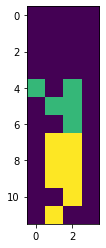

In [60]:
img = imageio.imread(os.path.join(image_root, img_fn))
#mask = cv2.resize(mask, dsize=(4,12))
plt.imshow(mask)
#plt.imshow(img)
mask.max()

In [56]:
len(ATR_LABEL)

18

In [6]:
import torch

a = torch.from_numpy(np.load(os.path.join(out_bi_mask_dir, mask_fn[:-4]+'.npy'))).float()
a = torch.flip(a.sum(0), [1])
a

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0